# **Modeling and simulation (Week 1)**

*   What is a system?
*   What is a model?
*   What is a simulation?
*   What are discrete and continuous variables?
*   What is the difference between deterministic and stochastic?

## **1D Random Walk**

A particle move in a 1D space: In one dimension the particle move up or down randomly with equal probability. The walks occurs for a given number of steps.

There is a reflecting barrier - if the particle collides with the reflecting barrier, the next step is up.  There is also an absorbing barrier - if the particle collides with the abasorbing barrier the walk ends (the particle disappears).

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/rwbarriers.png)

The input (independent) variables of the system: this is how you set up your system.

The output (dependent) variables of the system: this is what you observe according to the system setup.

What type of system are you modeling/observing?

## **Continuous Uniform Distribution**

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/320px-Uniform_Distribution_PDF_SVG.svg.png)   
[Continuous uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

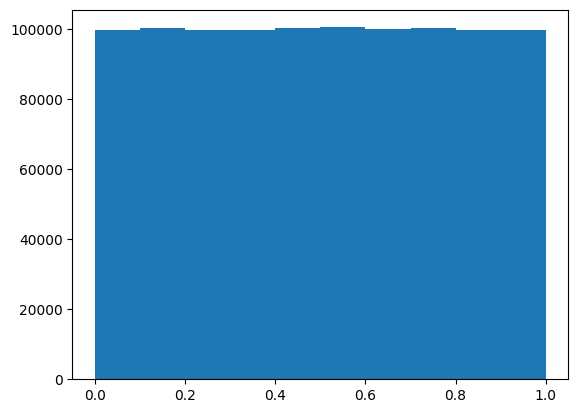

In [3]:
import numpy as np
import matplotlib.pyplot as plt

h = plt.hist(np.random.random(size=1000000))

In [5]:
(np.random.random(size=10) > 0.5).astype(int)

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1])

## **Assignments**

**Assignment 1**: Complete the code for the function that generates a number +1 or -1 with uniform probability.

In [6]:
def random_value():
    ## WRITE YOUR CODE HERE
    dir = 2*(np.random.random() > 0.5 ) - 1
    ## --------------------
    return dir

random_value()

1

**Assignment 2**: Complete the code for the funtion that generates a vector of N elements with +1 and -1 using a uniform distribution.

In [7]:
def random_vector(N):
    ## WRITE YOUR CODE HERE
    dir  = 2*(np.random.random(N) > 0.5 )-1
    ## --------------------
    return dir

random_vector(10)

array([-1, -1,  1,  1,  1,  1, -1, -1,  1, -1])

We can use this code for visualizing a non-limited random walk.

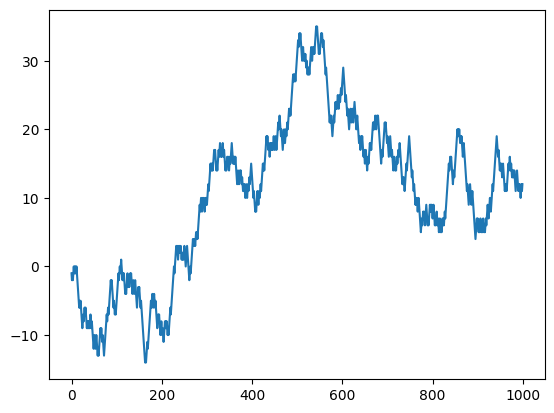

In [43]:
p = plt.plot(random_vector(1000).cumsum())

**Assignment 3**: Complete the code for the function that generates a 1D random walk.

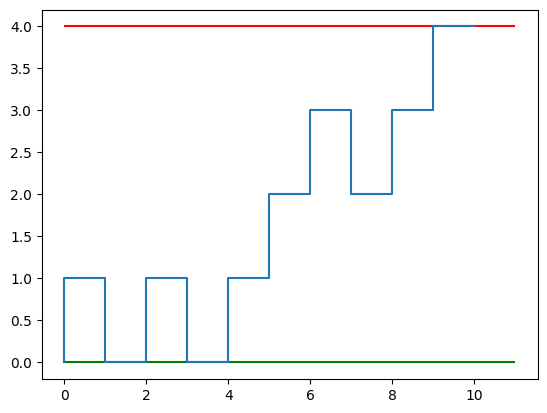

In [8]:
    
def make_walk(absorbing_barrier, reflecting_barrier=0, start=0):
    walk = [start]
    ## WRITE YOUR CODE HERE
    while walk[-1]<absorbing_barrier:
        
        if walk[-1] == reflecting_barrier:
            walk.append(1)

        else:
            walk.append(walk[-1] + random_value())
    
    ## --------------------
    return walk

absorbing_barrier = 4
walk = make_walk(absorbing_barrier)

plt.hlines(0, 0, len(walk), colors='g')
plt.hlines(absorbing_barrier, 0, len(walk), colors='r')
s = plt.step(range(len(walk)), walk)

In [9]:
walk = make_walk(absorbing_barrier)
print(walk, " - ", len(walk))

[0, 1, 0, 1, 0, 1, 2, 3, 2, 3, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 3, 4]  -  29


**Assignment 4**: Complete the code for the function that computes the average walk for a given absorbing barrier.

In [11]:
def average_steps(absorbing_barrier=4, num_trials=1000):
    ## WRITE YOUR CODE HERE
    pasosTotales = 0
    contador = 1
    
    while contador <= num_trials:
        contador += 1
        pasosTotales += len(make_walk(absorbing_barrier))-1 
        
        

    value = pasosTotales / num_trials
    return value

average_steps(absorbing_barrier=4, num_trials=10000)

16.0624

Let's compare with its theoretical average walk.

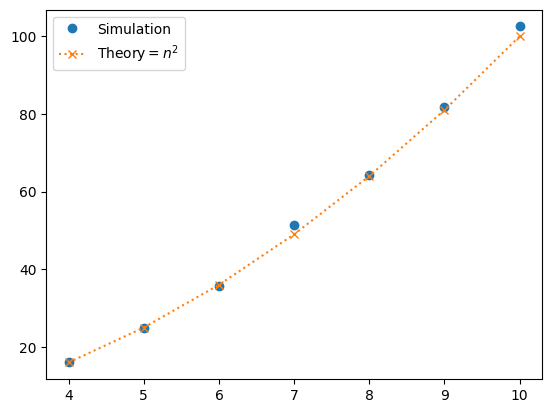

In [144]:
n = np.array([4, 5, 6, 7, 8, 9, 10])
mw = []  # mean life
for ni in n:
    mw.append(average_steps(absorbing_barrier=ni))
plt.plot(n, mw, "o", label="Simulation")  # Simulation
plt.plot(n, n**2, ":x", label=r"Theory$=n^2$")  # Theory
plt.legend();

## **Final Analysis**

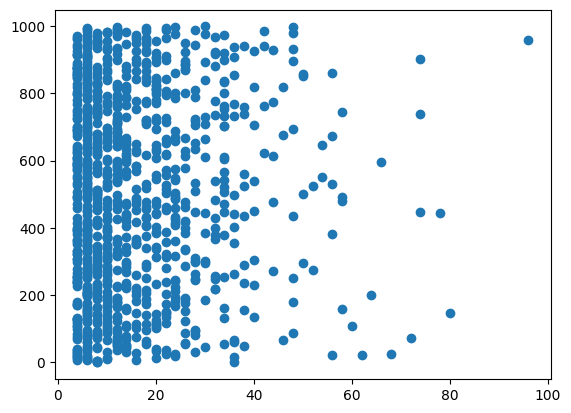

In [145]:
walk_n4 = np.array([len(make_walk(absorbing_barrier=4)) - 1 for i in range(1000)])
w = plt.plot(walk_n4, range(len(walk_n4)), 'o')

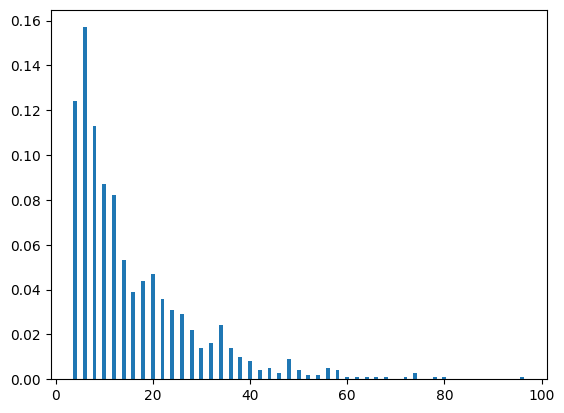

In [146]:
x, fx = np.unique(walk_n4, return_counts=True)
b = plt.bar(x, fx/fx.sum())

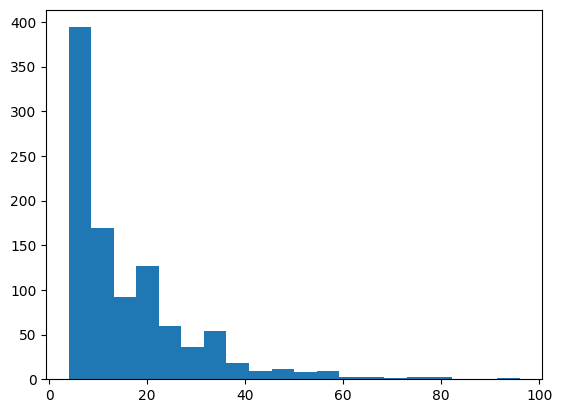

In [147]:
h = plt.hist(walk_n4, bins=20)

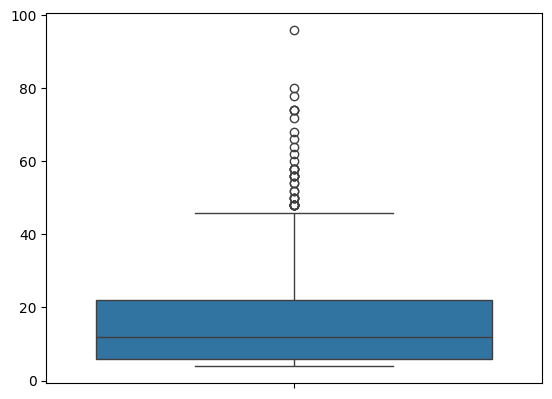

In [151]:
import seaborn as sns
bp = sns.boxplot(walk_n4)

**Assignment 5**: What is the minimum and maximum number of steps in 100000 executions when `absorbing_barrier=4`?

In [23]:
## WRITE YOUR CODE HERE
pasosTotales = 0
contador = 1
minimo = 100000000
maximo = 0
    
while contador <= 1000:
    contador += 1
    mini = np.min(len(make_walk(4))-1)
    maxi = np.max(len(make_walk(4))-1)

    if mini < minimo:
        minimo = mini
    
    if maxi > maximo:
        maximo = maxi

print ('minimo = ' , minimo)
print ('maximo = ' , maximo)
## --------------------

minimo =  4
maximo =  112


**Assignment 6**: Is the behavior observed with `absorbing_barrier=4` the same as the behavior that can be observed with `absorbing_barrier` in `[5, 6, 7, 8]`? What are the main differences and similarities in each case?

In [30]:
## WRITE YOUR CODE HERE
import numpy as np  
pasosTotales = 0


# Loop through different values of absBarrier
for absBarrier in range(4, 9):
    contador = 1
    minimo = 100000000
    maximo = 0

    while contador <= 1000:
        
        walk_length = len(make_walk(absBarrier)) - 1

        
        if walk_length < minimo:
            minimo = walk_length
        if walk_length > maximo:
            maximo = walk_length

        pasosTotales += walk_length
        contador += 1

    
    value = pasosTotales / 1000

   
    print('absBarrier =', absBarrier)
    print('minimo =', minimo)
    print('maximo =', maximo)
    print('promedio =', value)
    print('--------------------')


## --------------------

absBarrier = 4
minimo = 4
maximo = 88
promedio = 15.424
--------------------
absBarrier = 5
minimo = 5
maximo = 181
promedio = 41.402
--------------------
absBarrier = 6
minimo = 6
maximo = 232
promedio = 77.832
--------------------
absBarrier = 7
minimo = 7
maximo = 365
promedio = 127.006
--------------------
absBarrier = 8
minimo = 8
maximo = 350
promedio = 190.2
--------------------


The behavoir observed when the barrier's value is 4, 5, 6, 7 and 8 is logical because the bigger the value, the higher the average number of steps taken which. The similarities found are that no matter how big the barrier is, the minimal value will be the same as the barrier number, as seen in the result above. On the other hand the main difference resides in the average and maximun number of steps that have to be taken to reach the barrier, where after analizing the result I've concluded that the higher the value that the barrier takes, the higher the average steps will be, making also the max value higher in most circumstances, taking into account that this max value can change since it's generated by a random algorithm.